## Data 3550 Mid-Term Project
# Ayman Boules, Katherine Simon, Nicholas Sartino, Sammi Hamdan

## 1. Import the required packages

In [3]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/var/folders/q_/tlj94ng165zc5l_0x0clcwg00000gn/T/ipykernel_21823/2168730837.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above
/var/folders/q_/tlj94ng165zc5l_0x0clcwg00000gn/T/ipykernel_21823/2168730837.py:28: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 2. Import the dataset DF_AH.csv and perform Exploratory Data Analysis (15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliers, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data


In [4]:
df_ah = pd.read_csv('Dataset/DF_AH.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## Exploratory Data Analysis

In [5]:
# Info
df_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

In [7]:
# Basic Stats
df_ah.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
count,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2766.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,7.143948e+08,57.410256,57.471453,10115.260171,6.090256,5.563077,1971.323761,1984.254017,100.973122,438.720342,49.790427,559.056410,1047.567179,1156.227692,334.358632,4.684786,1495.271111,0.430575,0.060534,1.565470,0.378803,2.854017,1.044444,6.436581,0.597265,1978.110268,1.765732,472.090287,93.463248,47.305641,23.050940,2.596923,16.029402,1.893333,44.909744,6.218803,2007.791111,180447.728547,2542.838291,1490.586325,88.982906,2.215116,0.972991,0.945983,0.701197,0.003761,0.464274,0.250598,0.916923
std,1.887292e+08,42.663172,33.093889,7801.349001,1.404285,1.111993,30.246052,20.856787,176.451831,439.251044,169.274143,439.585774,422.809176,378.341327,426.378830,46.349684,489.694709,0.524105,0.244183,0.551925,0.502486,0.827591,0.214251,1.559522,0.645297,25.527487,0.760045,213.922342,126.040109,66.895903,64.186809,25.162589,56.131397,32.964272,472.237990,2.712133,1.317483,78532.499818,766.279396,487.192027,107.497846,0.804046,0.162136,0.226090,0.457812,0.061219,0.498807,0.433432,0.276046
min,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,334.000000,334.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.284770e+08,20.000000,43.000000,7440.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,2004.000000,1120.000000,0.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.000000,990.000000,1083.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,2452.000000,1440.000000,50.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,9.071811e+08,70.000000,78.000000,11520.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,801.000000,1300.000000,1383.000000,703.000000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,

In [9]:
# Preview rows
df_ah.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


In [11]:
# Count the number of missing values in each column
print(df_ah.isnull().sum())

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              2727
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1773
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            79
Bsmt Cond            79
Bsmt Exposure        82
BsmtFin Type 1       79
BsmtFin SF 1          0
BsmtFin Type 2       80
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     

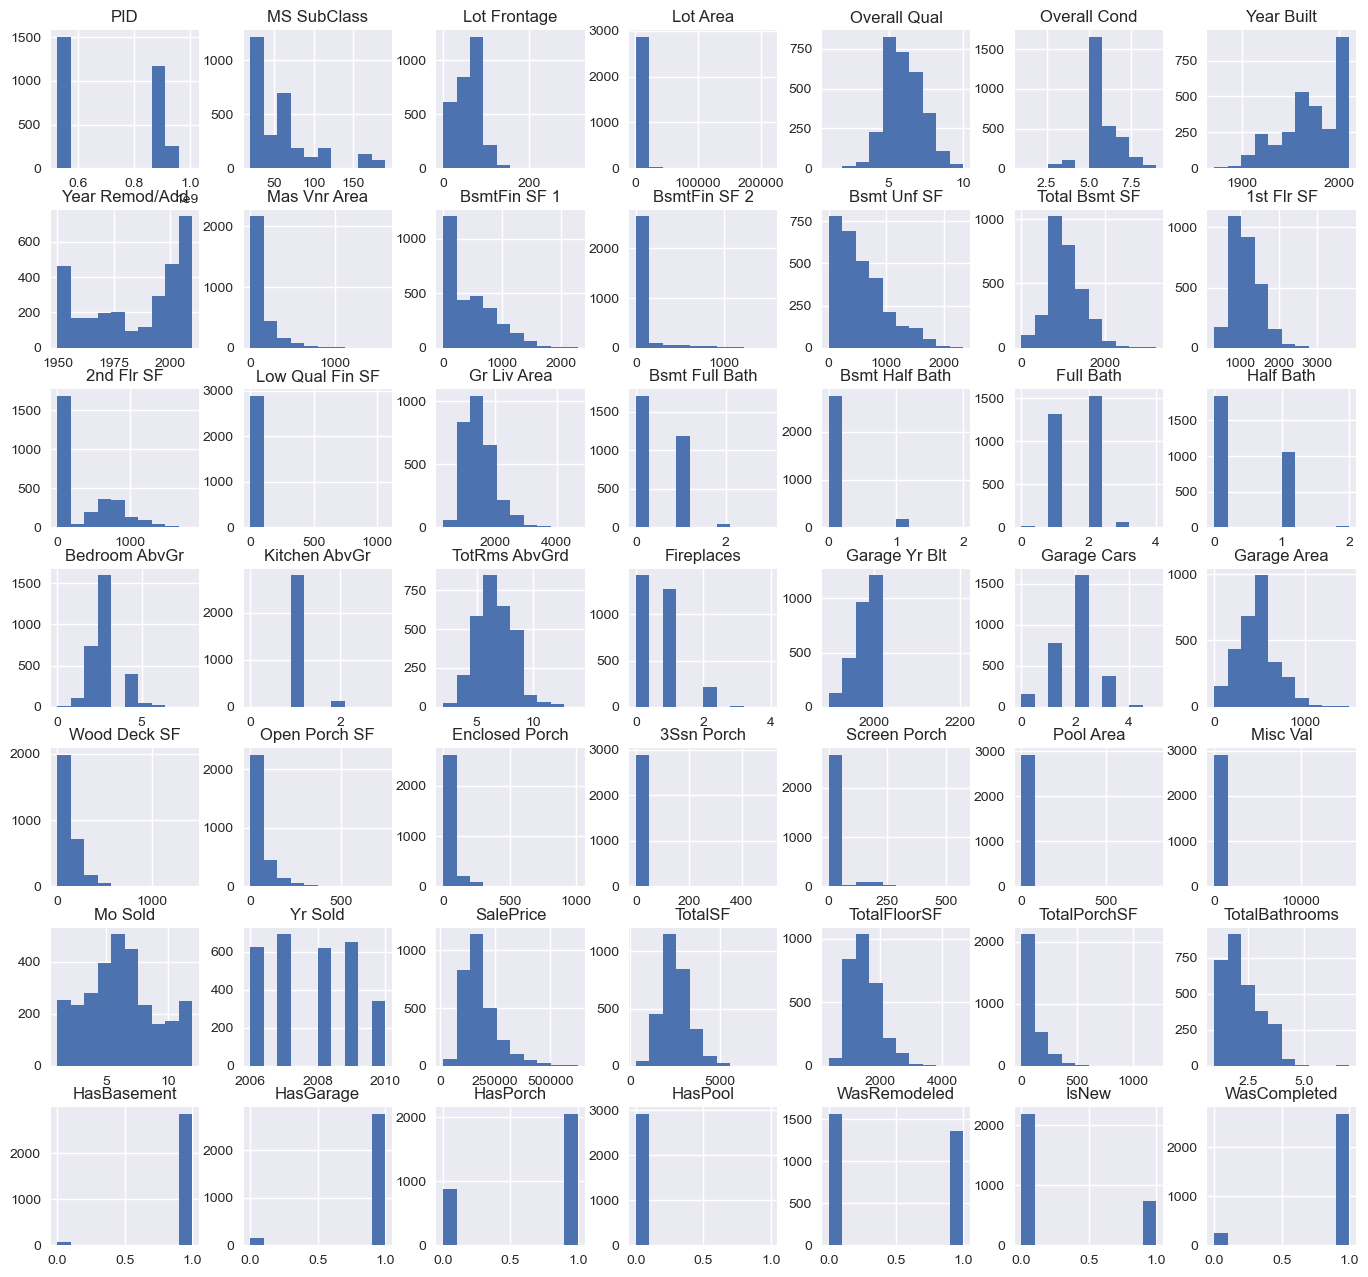

In [15]:
# Histograms
df_ah.hist(figsize=(15, 15))
plt.show()